<a href="https://colab.research.google.com/github/moeed17/AudioSignal_Perturbation_Analysis/blob/main/Random_Forest_%26_Shap_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
!pip install -U scikit-learn
from sklearn import datasets

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


(1797, 8, 8)
(1797, 64)


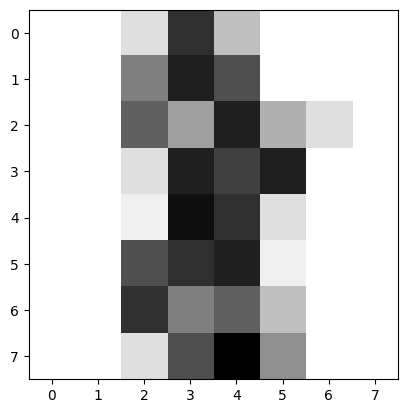

In [ ]:
digits = datasets.load_digits()

print(digits.images.shape)
print(digits.data.shape)

plt.imshow(digits.images[170], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

from sklearn.ensemble import RandomForestClassifier

estimators=10
model = RandomForestClassifier(n_estimators=estimators)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.95

Confusion Matrix

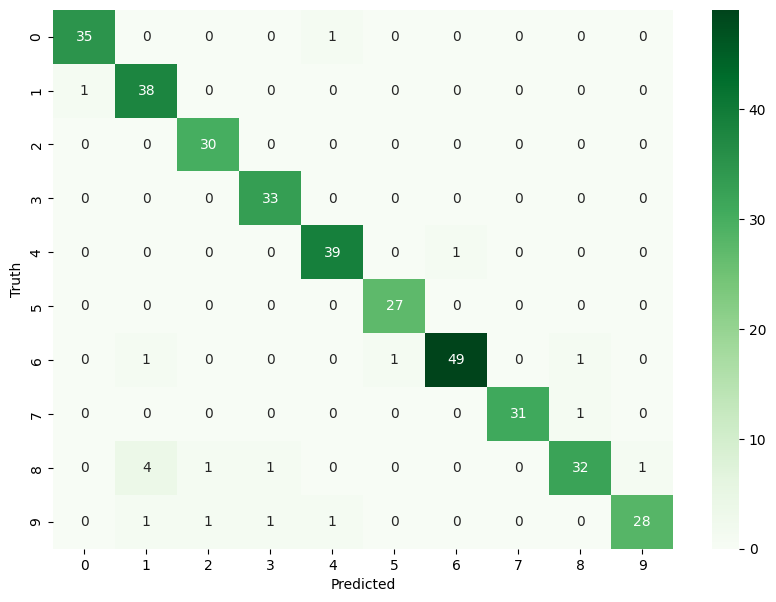

In [ ]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)

color=sns.color_palette("crest", as_cmap=True)

plt.figure(figsize=(10,7))
sns.heatmap(cm,cmap="Greens", annot=True) #writes data value on each cell
plt.xlabel('Predicted')
plt.ylabel('Truth');



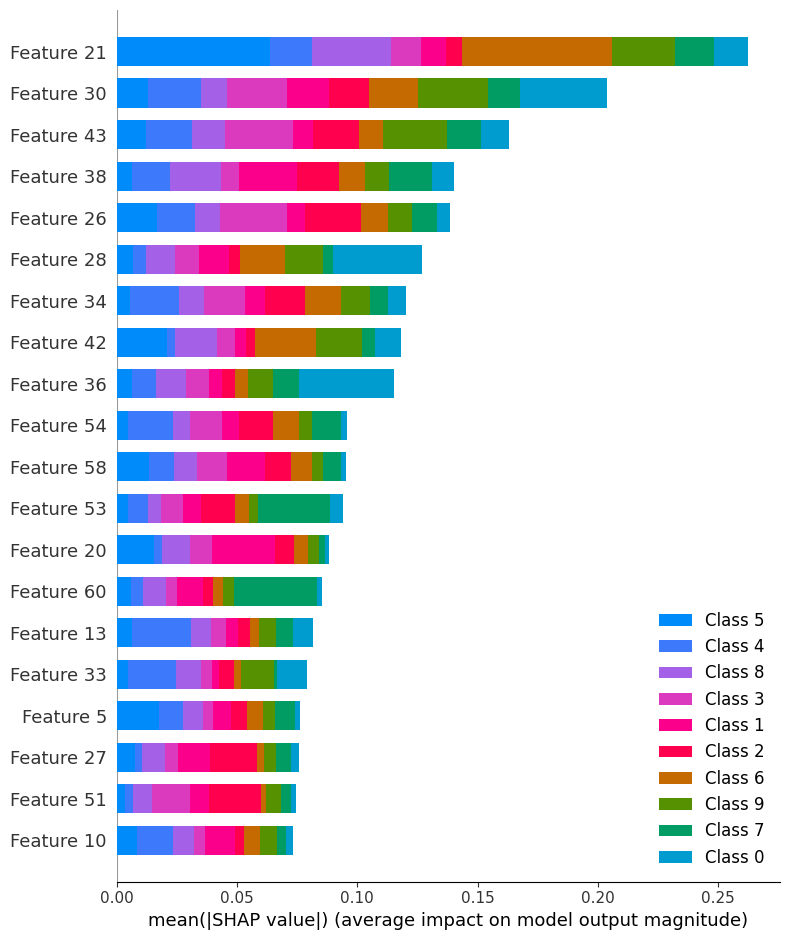

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [ ]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

estimators=50
model = RandomForestClassifier(n_estimators=estimators)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9333333333333333

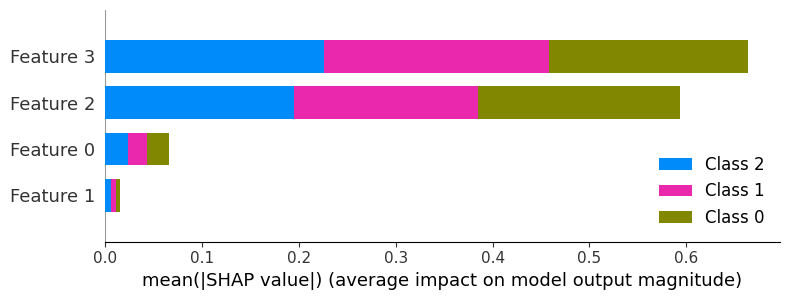

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")